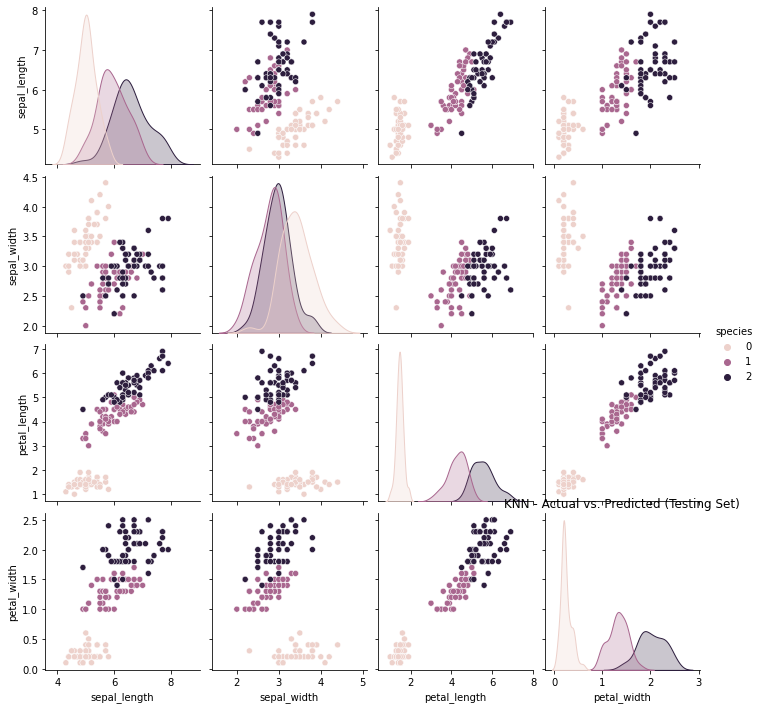

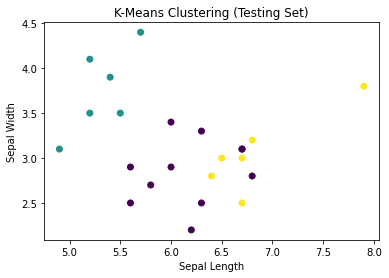


KNN Model Evaluation:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

K-Means Clustering Quality Metrics:
Silhouette Score (Testing): 0.5318
Davies-Bouldin Index (Testing): 0.6372

Naive Bayes Model Evaluation:
Accuracy: 0.9565
Precision: 0.9620
Recall: 0.9565
F1 Score: 0.9568


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#Load file
file_name = "IRIS.csv"
# Read the CSV file
iris_df = pd.read_csv(file_name, dtype={'species': str})
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_df.columns = columns

# Encode the 'species' column into numerical labels
iris_df['species'] = pd.Categorical(iris_df['species']).codes

# Extract features and labels
X = iris_df.drop("species", axis=1)
y = iris_df["species"]

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# KNN Model Implementation
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions_val = knn_model.predict(X_val)
knn_predictions_test = knn_model.predict(X_test)

# Visualize KNN Results
sns.pairplot(iris_df, hue="species")
plt.title("KNN - Actual vs. Predicted (Testing Set)")
plt.show()

# K-Means Model Implementation
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_train)
kmeans_predictions_val = kmeans_model.predict(X_val)
kmeans_predictions_test = kmeans_model.predict(X_test)

# Visualize K-Means Results
plt.scatter(X_test['sepal_length'], X_test['sepal_width'], c=kmeans_predictions_test, cmap='viridis')
plt.title("K-Means Clustering (Testing Set)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

# Naive Bayes Model Implementation
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions_val = nb_model.predict(X_val)
nb_predictions_test = nb_model.predict(X_test)

# Evaluation and Parameter Printing
def evaluate_and_print(predictions, actual_labels, model_name):
    accuracy = metrics.accuracy_score(actual_labels, predictions)
    precision = metrics.precision_score(actual_labels, predictions, average="weighted")
    recall = metrics.recall_score(actual_labels, predictions, average="weighted")
    f1 = metrics.f1_score(actual_labels, predictions, average="weighted")

    print(f"\n{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# KNN Evaluation
evaluate_and_print(knn_predictions_test, y_test, "KNN")

# K-Means (Clustering Quality Metrics)
silhouette_test = silhouette_score(X_test, kmeans_predictions_test)
db_index_test = davies_bouldin_score(X_test, kmeans_predictions_test)

print("\nK-Means Clustering Quality Metrics:")
print(f"Silhouette Score (Testing): {silhouette_test:.4f}")
print(f"Davies-Bouldin Index (Testing): {db_index_test:.4f}")

# Naive Bayes Evaluation
evaluate_and_print(nb_predictions_test, y_test, "Naive Bayes")

plt.show()


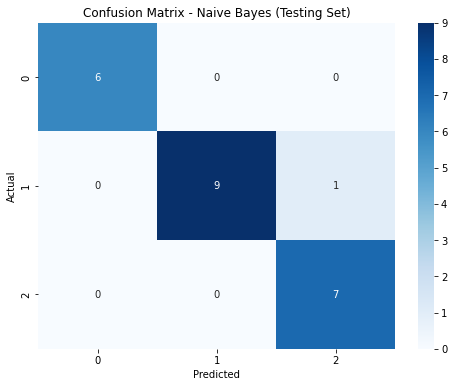

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Naive Bayes Model Implementation
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions_val = nb_model.predict(X_val)
nb_predictions_test = nb_model.predict(X_test)

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, nb_predictions_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=iris_df['species'].unique(), yticklabels=iris_df['species'].unique())
plt.title('Confusion Matrix - Naive Bayes (Testing Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [56]:
from sklearn.metrics import classification_report

# Evaluation and Parameter Printing
def evaluate_and_print(predictions, actual_labels, model_name):
    # Convert predictions to string type
    predictions = predictions.astype(str)
    
    accuracy = metrics.accuracy_score(actual_labels, predictions)
    precision = metrics.precision_score(actual_labels, predictions, average="weighted")
    recall = metrics.recall_score(actual_labels, predictions, average="weighted")
    f1 = metrics.f1_score(actual_labels, predictions, average="weighted")

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

# KNN Evaluation
evaluate_and_print(knn_predictions_test, y_test, "KNN")


# K-Means (Clustering Quality Metrics)
silhouette_test = silhouette_score(X_test, kmeans_predictions_test)
db_index_test = davies_bouldin_score(X_test, kmeans_predictions_test)

print("\nK-Means Clustering Quality Metrics:")
print(f"Silhouette Score (Testing): {silhouette_test:.4f}")
print(f"Davies-Bouldin Index (Testing): {db_index_test:.4f}")

# Naive Bayes Evaluation
evaluate_and_print(nb_predictions_test, y_test, "Naive Bayes")


# Convert labels to string type
iris_df['species'] = iris_df['species'].astype(str)

# Convert predictions to string type for classification report
knn_predictions_test_str = knn_predictions_test.astype(str)
nb_predictions_test_str = nb_predictions_test.astype(str)

# Combined Evaluation Metrics
print("\nCombined Model Evaluation Metrics:")
knn_metrics = metrics.classification_report(y_test, knn_predictions_test_str, target_names=iris_df['species'].unique().tolist())
kmeans_metrics = f"Silhouette Score (Testing): {silhouette_test:.4f}\nDavies-Bouldin Index (Testing): {db_index_test:.4f}"
nb_metrics = metrics.classification_report(y_test, nb_predictions_test_str, target_names=iris_df['species'].unique().tolist())

# Print and display metrics
print("KNN Model Evaluation:")
print(knn_metrics)
print("\nK-Means Model Evaluation:")
print(kmeans_metrics)
print("\nNaive Bayes Model Evaluation:")
print(nb_metrics)

best_model = max(["KNN", "K-Means", "Naive Bayes"], key=lambda model: metrics.accuracy_score(y_test, globals()[f"{model.lower().replace(' ', '_')}_predictions_test"]) if f"{model.lower().replace(' ', '_')}_predictions_test" in globals() else 0)

print(f"\nBest Model (based on Accuracy): {best_model}")


Model: KNN
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

K-Means Clustering Quality Metrics:
Silhouette Score (Testing): 0.5318
Davies-Bouldin Index (Testing): 0.6372
Model: Naive Bayes
Accuracy: 0.9565
Precision: 0.9620
Recall: 0.9565
F1 Score: 0.9568

Combined Model Evaluation Metrics:
KNN Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23


K-Means Model Evaluation:
Silhouette Score (Testing): 0.5318
Davies-Bouldin Index (Testing): 0.6372

Naive Bayes Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.90      0.95  

In [52]:
# Encode the 'species' column into numerical labels
iris_df['species'] = pd.Categorical(iris_df['species']).codes.astype(str)

# Extract features and labels
X = iris_df.drop("species", axis=1)
y = iris_df['species']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)




Combined Model Evaluation Metrics:
